In [90]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [91]:
plt.subplot(3,2,1)

In [92]:
x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.array(zip(x1,x2)).reshape(len(x1),2)

In [93]:
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Instances")
plt.scatter(x1,x2)

In [94]:
colors=["b","g","r","c","m","y","k","b"]
markers=["o","s","D","v","^","p","*","+"]

In [95]:
clusters=[2,3,4,5,8]
subplot_counter=1
sc_scores=[]

In [96]:
for t in clusters:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls="None")
    plt.xlim([0,10])
    plt.ylim([0,10])
    sc_score=silhouette_score(X,kmeans_model.labels_,metric="euclidean")
    sc_scores.append(sc_score)
    plt.title("K=%s,silhouette coefficient=%0.03f"%(t,sc_score))

In [97]:
plt.figure()

In [98]:
plt.plot(clusters,sc_scores,"*-")

In [99]:
plt.xlabel("Number of Clusters")

In [100]:
plt.ylabel("Silhouette Coefficient Score")

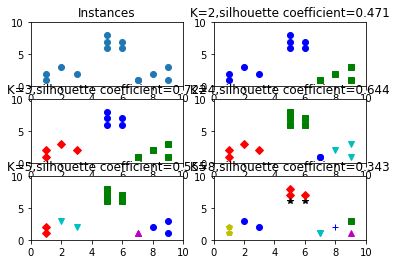

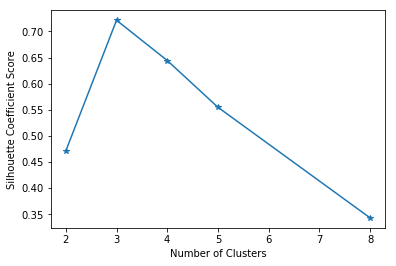

In [101]:
plt.show()

In [102]:
sc_scores

[0.47114752373147084,
 0.72152991499839714,
 0.64442490492524895,
 0.5548170502705031,
 0.34295403537964375]

#"肘部"观察法

In [104]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [109]:
cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(5.5,6.5,(2,10))
cluster3=np.random.uniform(3.0,4.0,(2,10))

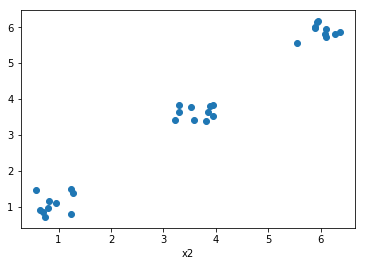

In [110]:
X=np.hstack((cluster1,cluster2,cluster3)).T
plt.scatter(X[:,0],X[:,1])
plt.xlabel("x1")
plt.xlabel("x2")
plt.show()

In [111]:
K=range(1,10)
meandistortions=[]

In [114]:
for k in K:
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X,Kmeans.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

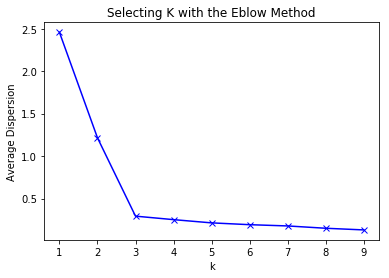

In [115]:
plt.plot(K,meandistortions,"bx-")
plt.xlabel("k")
plt.ylabel("Average Dispersion")
plt.title("Selecting K with the Eblow Method")
plt.show()